AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

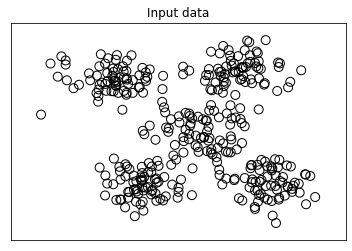

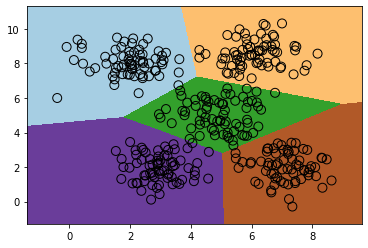

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Load input data
X = np.loadtxt('data_clustering.txt', delimiter=',')

# We need to define the number of clusters before we can apply K-Means algorithm:
num_clusters = 5

# Visualize the input data to see what the spread looks like:
# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',edgecolors='black', s=80)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# Create KMeans object
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model with the input data
kmeans.fit(X)

# To visualize the boundaries, we need to create a grid of points and evaluate the model on
# all those points. Let's define the step size of this grid:
# Step size of the mesh
step_size = 0.01

# We define the grid of points and ensure that we are covering all the values in our input data:
# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))

# Predict output labels for all the points on the grid using the trained K-Means model
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])


# Plot different regions and color them
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',extent=(x_vals.min(), x_vals.max(),
y_vals.min(), y_vals.max()),
cmap=plt.cm.Paired,
aspect='auto',
origin='lower')

# Overlay input points on top of the colored regions
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none',edgecolors='black', s=80)

# Plot the centers of clusters obtained using the K-Means Algorithm
cluster_centers = kmeans.cluster_centers_.scatter(cluster_centers[:,0], cluster_centers[:,1],
marker='o', s=210, linewidths=4, color='black',zorder=12, facecolors='black')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()